# FINAL PROJEK DATA MINING

## 1. 📥 Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = r"C:\Users\febri\OneDrive\Documents\Semester 4\FP DATAMINING\Online Retail.xlsx"
df = pd.read_excel(file_path)

In [ ]:
print("Jumlah Baris dan Kolom:", df.shape)

Jumlah Baris dan Kolom: (541909, 8)


In [ ]:
print("Tipe Data Tiap Kolom:\n", df.dtypes)

Tipe Data Tiap Kolom:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [ ]:
print("\nJumlah Missing Values Tiap Kolom:\n", df.isnull().sum())


Jumlah Missing Values Tiap Kolom:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


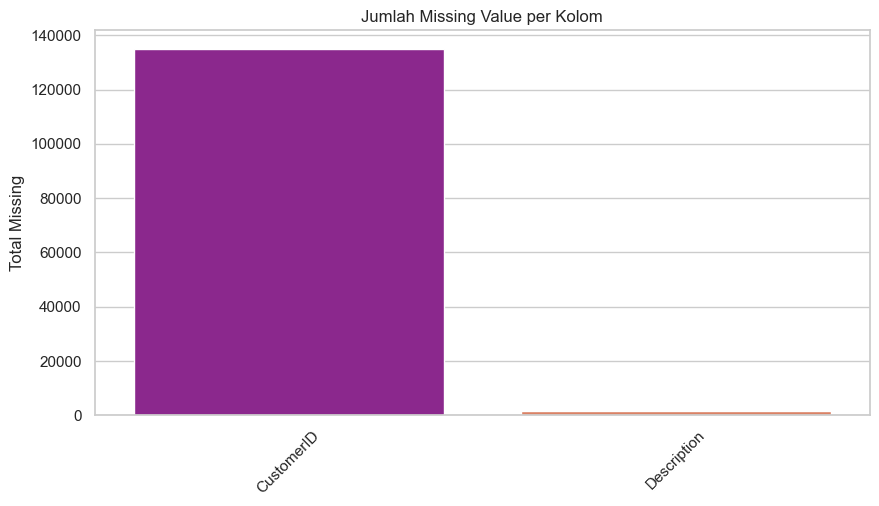

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, palette="plasma")
plt.title("Jumlah Missing Value per Kolom")
plt.ylabel("Total Missing")
plt.xticks(rotation=45)
plt.show()

## 2. 🧹 Data Cleaing

In [ ]:
# Drop NA pada CustomerID (karena analisis berbasis customer)
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
# Hapus transaksi dengan Quantity atau UnitPrice negatif
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Tampilkan info setelah cleaning
print("\nData setelah pembersihan:")
print(df.info())
df.head()


Data setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 3. 📊 Exploratory Data Analysis (EDA)

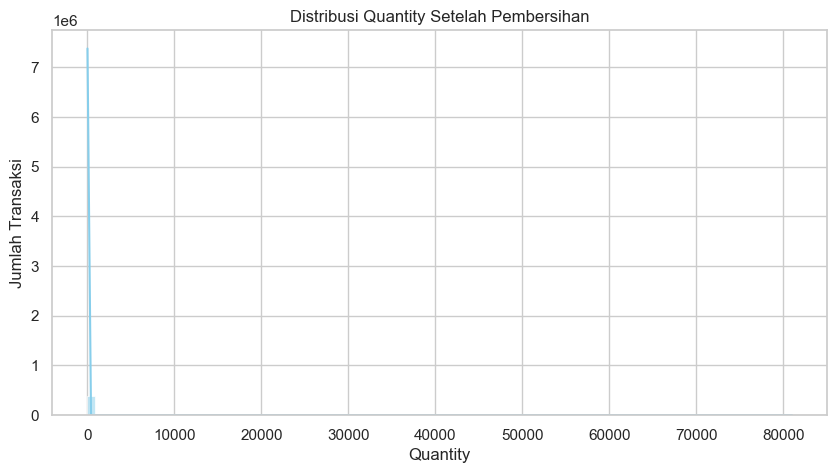

In [ ]:
# Distribusi Quantity
plt.figure(figsize=(10, 5))
sns.histplot(df['Quantity'], bins=100, kde=True, color='skyblue')
plt.title("Distribusi Quantity Setelah Pembersihan")
plt.xlabel("Quantity")
plt.ylabel("Jumlah Transaksi")
plt.show()

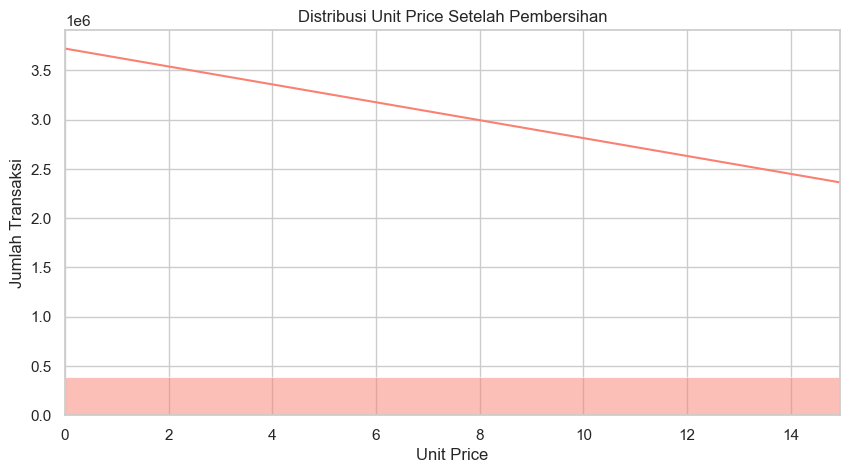

In [ ]:
# Distribusi UnitPrice
plt.figure(figsize=(10, 5))
sns.histplot(df['UnitPrice'], bins=100, kde=True, color='salmon')
plt.title("Distribusi Unit Price Setelah Pembersihan")
plt.xlabel("Unit Price")
plt.ylabel("Jumlah Transaksi")
plt.xlim(0, df['UnitPrice'].quantile(0.99))
plt.show()

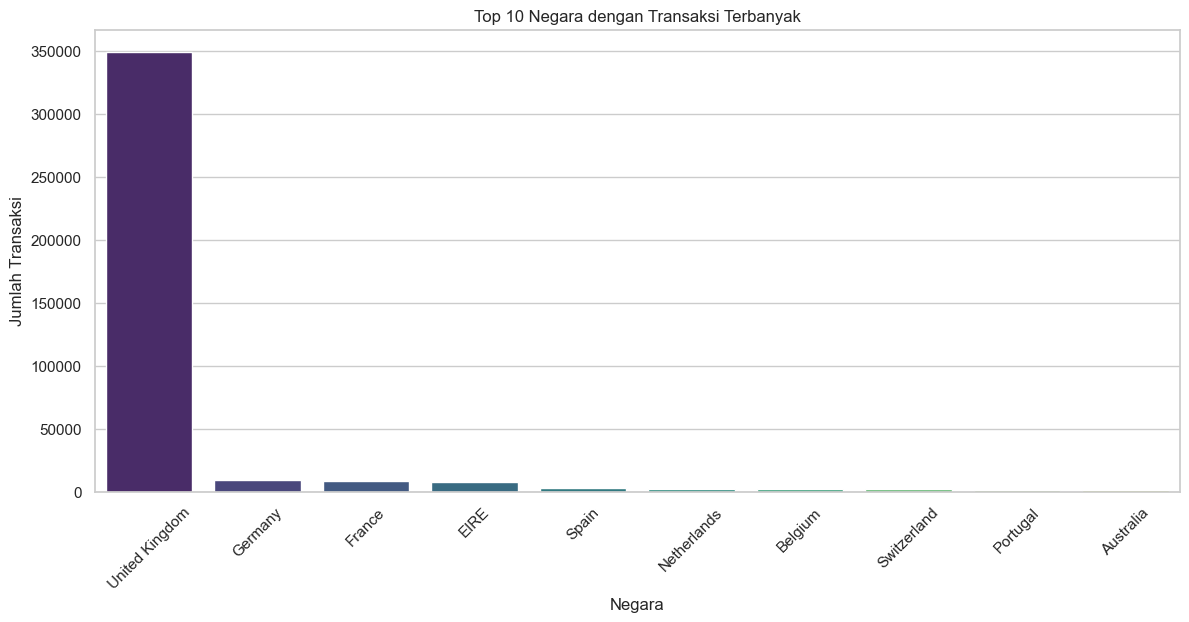

In [ ]:
# Transaksi per negara (Top 10)
plt.figure(figsize=(14, 6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Negara dengan Transaksi Terbanyak")
plt.ylabel("Jumlah Transaksi")
plt.xlabel("Negara")
plt.xticks(rotation=45)
plt.show()

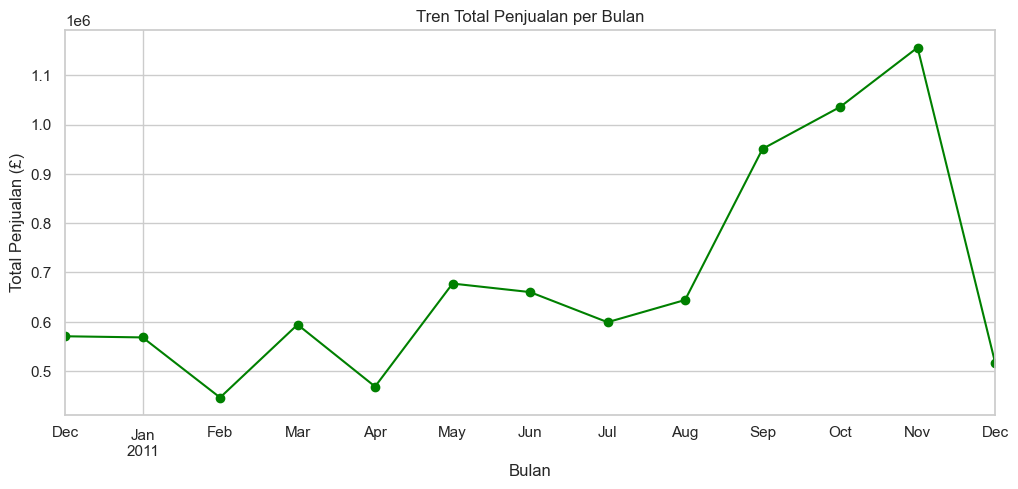

In [ ]:
# Tren waktu: Transaksi per bulan
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Tren Total Penjualan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan (£)")
plt.grid(True)
plt.show()

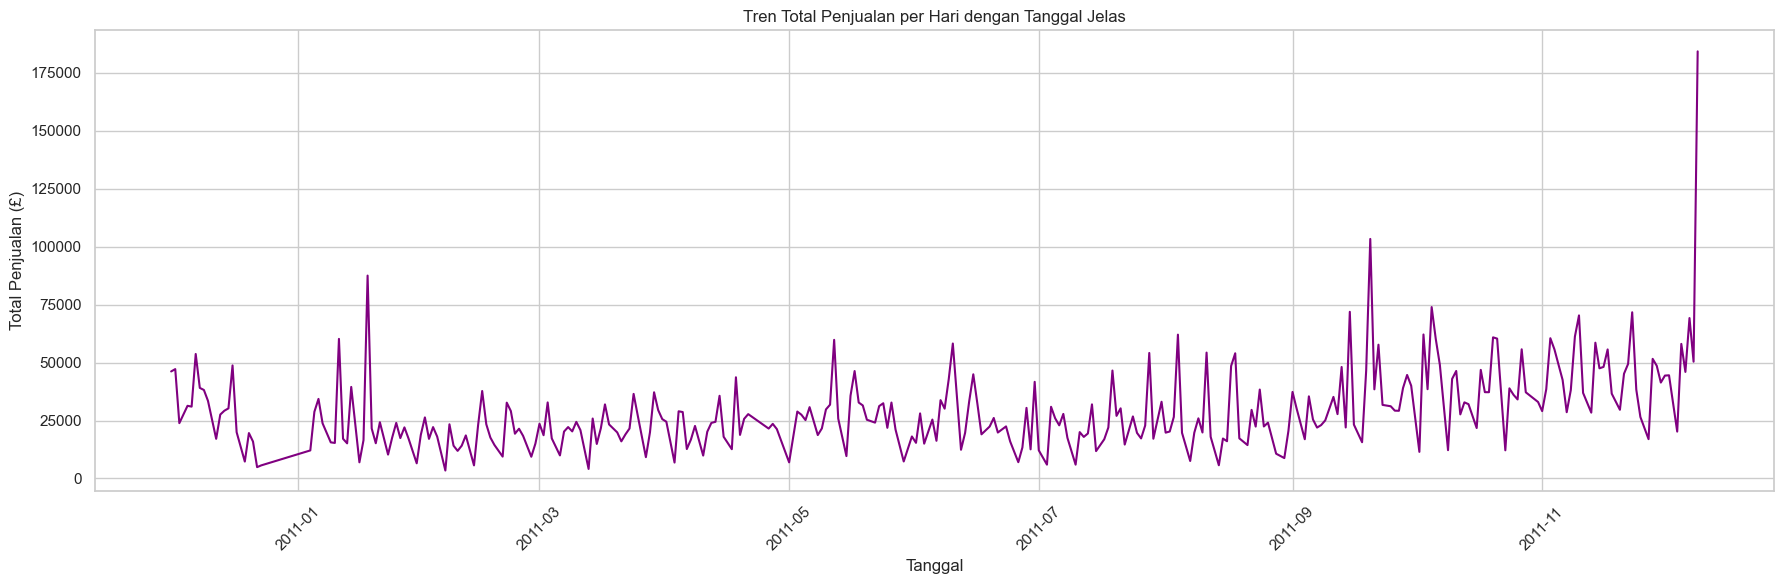

In [ ]:
# Tren waktu: Transaksi per hari
df['InvoiceDay'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('InvoiceDay')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.lineplot(data=daily_sales, x='InvoiceDay', y='TotalPrice', color='purple')
plt.title("Tren Total Penjualan per Hari dengan Tanggal Jelas")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

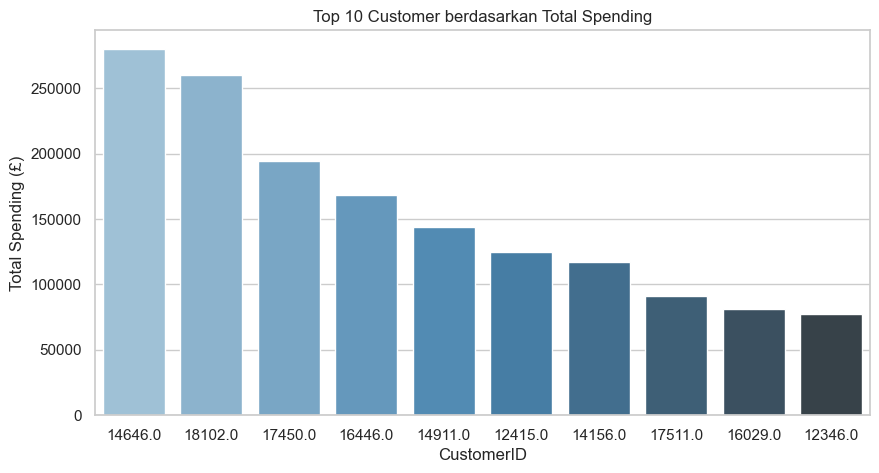

In [ ]:
# Top 10 Customer berdasarkan Total Spending
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='Blues_d')
plt.title("Top 10 Customer berdasarkan Total Spending")
plt.xlabel("CustomerID")
plt.ylabel("Total Spending (£)")
plt.show()

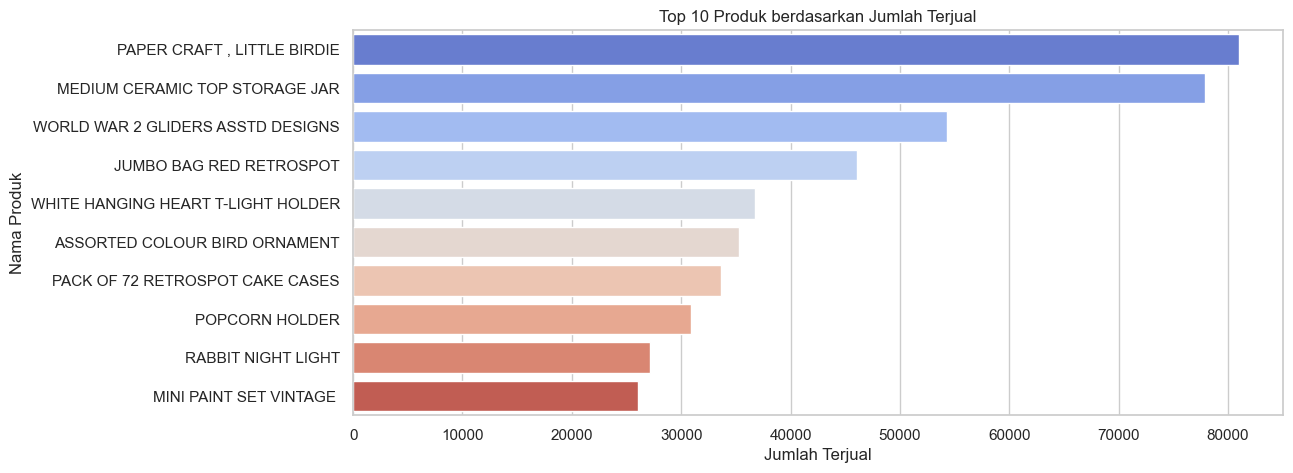

In [ ]:
# Top 10 Produk berdasarkan Quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("Top 10 Produk berdasarkan Jumlah Terjual")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Nama Produk")
plt.show()

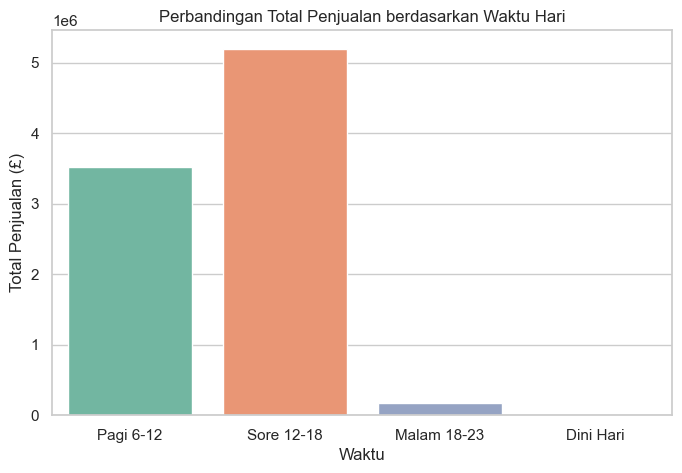

In [ ]:
# Perbandingan penjualan pagi, sore, malam
df['Hour'] = df['InvoiceDate'].dt.hour
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Pagi 6-12'
    elif 12 <= hour < 18:
        return 'Sore 12-18'
    elif 18 <= hour <= 23:
        return 'Malam 18-23'
    else:
        return 'Dini Hari'

df['TimeSegment'] = df['Hour'].apply(time_of_day)
time_sales = df.groupby('TimeSegment')['TotalPrice'].sum().reindex(['Pagi 6-12', 'Sore 12-18', 'Malam 18-23', 'Dini Hari'])

plt.figure(figsize=(8, 5))
sns.barplot(x=time_sales.index, y=time_sales.values, palette='Set2')
plt.title("Perbandingan Total Penjualan berdasarkan Waktu Hari")
plt.xlabel("Waktu")
plt.ylabel("Total Penjualan (£)")
plt.show()

# Interpretasi:
# - Waktu "Siang" menghasilkan penjualan tertinggi dibandingkan waktu lainnya.
# - Penjualan cukup tinggi juga di waktu "Pagi", menandakan aktivitas belanja pagi hari aktif.
# - "Malam" dan "Dini Hari" memiliki volume transaksi yang lebih rendah, menunjukkan sedikit transaksi terjadi di luar jam kerja.


<Figure size 1600x800 with 0 Axes>

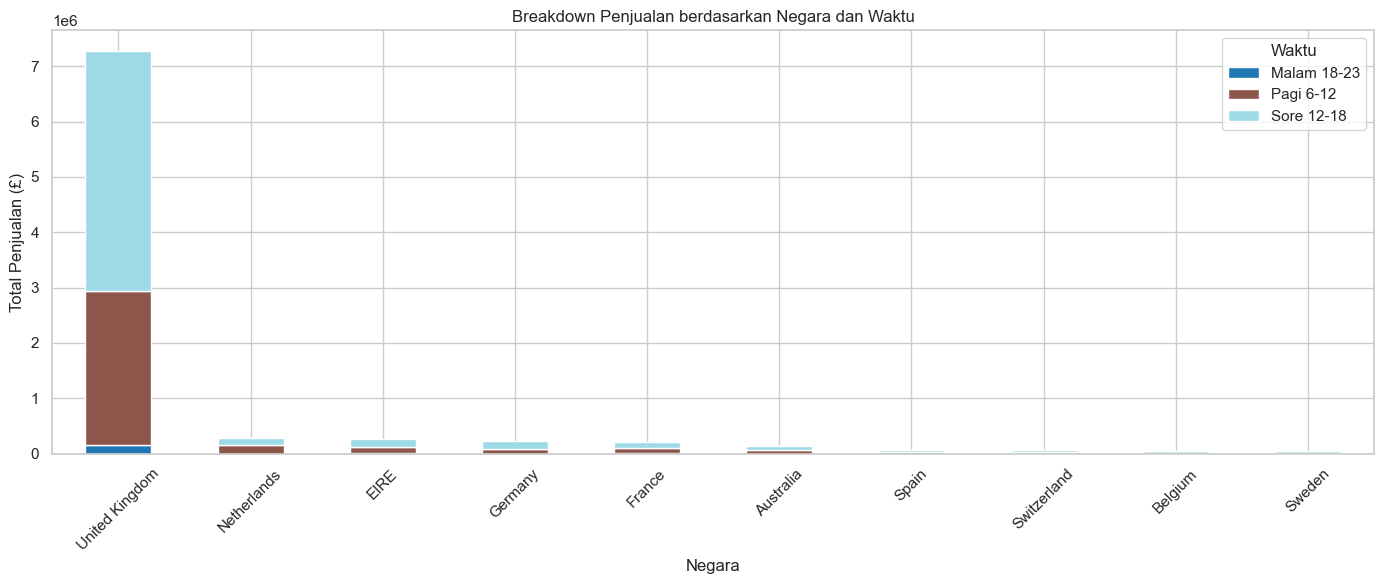

In [ ]:
# Breakdown penjualan berdasarkan negara dan waktu
time_country = df.groupby(['Country', 'TimeSegment'])['TotalPrice'].sum().reset_index()
time_country_pivot = time_country.pivot(index='Country', columns='TimeSegment', values='TotalPrice').fillna(0)

plt.figure(figsize=(16,8))
time_country_pivot.loc[time_country_pivot.sum(axis=1).sort_values(ascending=False).head(10).index].plot(kind='bar', stacked=True, colormap='tab20', figsize=(14,6))
plt.title("Breakdown Penjualan berdasarkan Negara dan Waktu")
plt.xlabel("Negara")
plt.ylabel("Total Penjualan (£)")
plt.legend(title="Waktu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📦 4. Recency, frequency, and monetary (RFM)  

In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print("\nContoh data RFM:")
print(rfm.head())


Contoh data RFM:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [ ]:
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_normalized = pd.DataFrame(rfm_normalized, columns=['Recency_Norm', 'Frequency_Norm', 'Monetary_Norm'])
rfm_normalized['CustomerID'] = rfm['CustomerID'].values
rfm_full = pd.concat([rfm, rfm_normalized[['Recency_Norm', 'Frequency_Norm', 'Monetary_Norm']]], axis=1)

In [ ]:
# Tampilkan hasil normalisasi
print("\nContoh Data Setelah Normalisasi:")
print(rfm_full[['CustomerID', 'Recency', 'Recency_Norm', 'Frequency', 'Frequency_Norm', 'Monetary', 'Monetary_Norm']].head())


Contoh Data Setelah Normalisasi:
   CustomerID  Recency  Recency_Norm  Frequency  Frequency_Norm  Monetary  \
0     12346.0      326      2.334574          1       -0.425097  77183.60   
1     12347.0        2     -0.905340          7        0.354417   4310.00   
2     12348.0       75     -0.175360          4       -0.035340   1797.24   
3     12349.0       19     -0.735345          1       -0.425097   1757.55   
4     12350.0      310      2.174578          1       -0.425097    334.40   

   Monetary_Norm  
0       8.363010  
1       0.251699  
2      -0.027988  
3      -0.032406  
4      -0.190812  


In [ ]:
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_scaled = scaler.fit_transform(rfm_features)

inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(rfm_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))

In [ ]:
print("Silhouette Scores per K:")
for k, score in zip(k_range, silhouette_scores):
    print(f"K={k}: {score:.4f}")

Silhouette Scores per K:
K=2: 0.5604
K=3: 0.5853
K=4: 0.6162
K=5: 0.6165
K=6: 0.5983
K=7: 0.5171
K=8: 0.4912
K=9: 0.4784
K=10: 0.4448


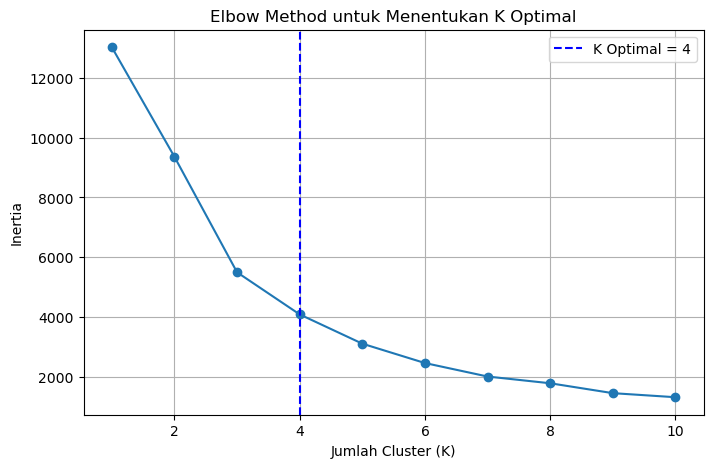

In [ ]:
# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), [KMeans(n_clusters=k, random_state=42).fit(rfm_scaled).inertia_ for k in range(1, 11)], marker='o')
plt.axvline(x=4, color='blue', linestyle='--', label='K Optimal = 4')
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.legend()
plt.grid(True)
plt.show()

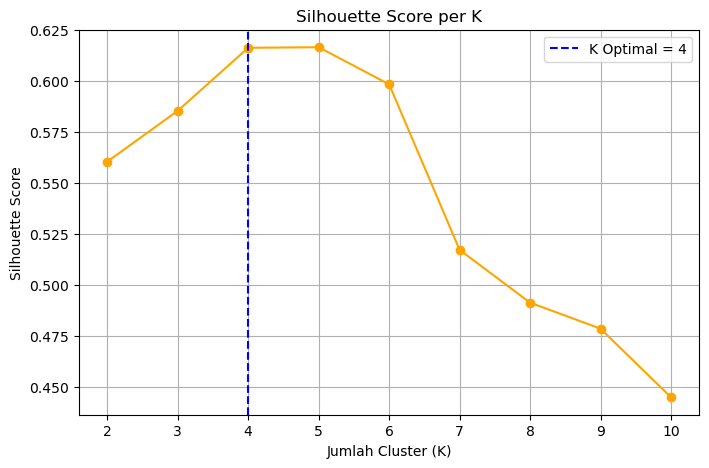

In [ ]:
# Plot Silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.axvline(x=4, color='blue', linestyle='--', label='K Optimal = 4')
plt.title("Silhouette Score per K")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [ ]:
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_full['Cluster'] = rfm['Cluster']  # penting!

In [ ]:
# 7. Interpretasi
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_labels = {
    0: 'Value Seekers',
    1: 'At Risk Loyalist',
    2: 'Champions',
    3: 'New & Hopeful'
}
rfm['Cluster_Label'] = rfm['Cluster'].map(cluster_labels)

In [ ]:
# Strategi Bisnis
strategy_map = {
    0: "Dorong repeat order, edukasi manfaat produk, promo onboarding.",
    1: "Kirim email reminder, tawarkan diskon eksklusif untuk reaktivasi.",
    2: "Beri penghargaan, program loyalitas, rekomendasi produk premium.",
    3: "Upsell/cross-sell produk, tawarkan bundle hemat."
}

cluster_summary['Segment'] = cluster_summary.index.map(cluster_labels)
cluster_summary['Strategi Bisnis'] = cluster_summary.index.map(strategy_map)

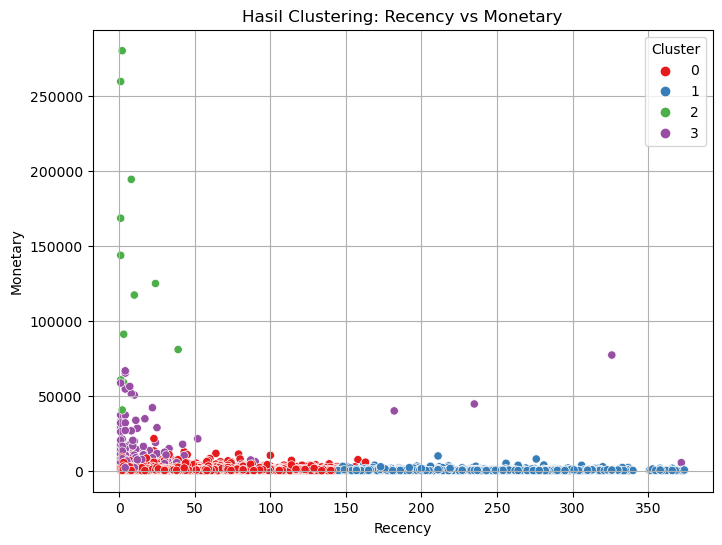

In [ ]:
# 8. Visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1')
plt.title("Hasil Clustering: Recency vs Monetary")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.grid(True)
plt.show()

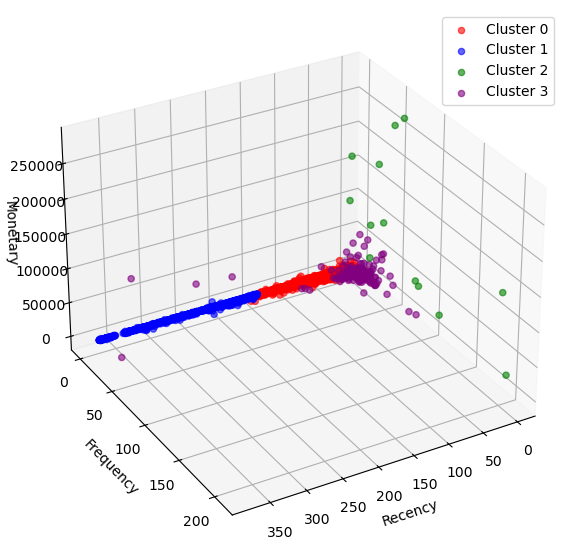

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


# Buat figure dan axis 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Warna per cluster
colors = ['red', 'blue', 'green', 'purple']

# Plot semua cluster
for cluster in sorted(rfm['Cluster'].unique()):
    data = rfm[rfm['Cluster'] == cluster]
    ax.scatter(data['Recency'], data['Frequency'], data['Monetary'],
               color=colors[cluster], label=f"Cluster {cluster}", alpha=0.6)


# Label dan Judul
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Atur sudut pandang kamera
ax.view_init(elev=30, azim=60)

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()


In [ ]:
## 6.🧪 Evaluasi Clustering (Elbow & Silhouette)

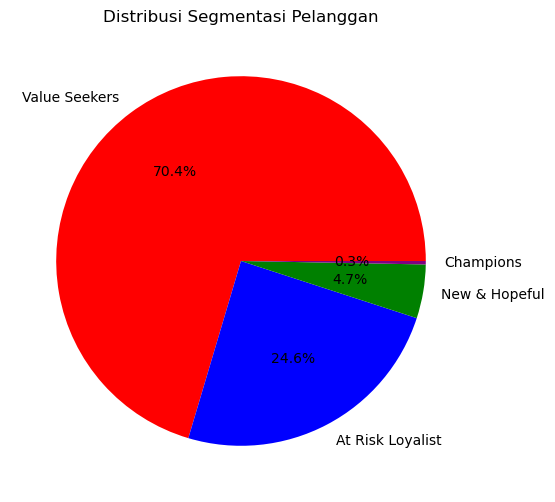

In [ ]:
# Pie Chart Distribusi
plt.figure(figsize=(6, 6))
rfm['Cluster_Label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue', 'green', 'purple'])
plt.title("Distribusi Segmentasi Pelanggan")
plt.ylabel("")
plt.show()

In [ ]:
# Rata-rata tiap cluster
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nRingkasan Rata-rata RFM Tiap Cluster:")
print(cluster_summary)


Ringkasan Rata-rata RFM Tiap Cluster:
            Recency  Frequency       Monetary
Cluster                                      
0         43.702685   3.682711    1353.625312
1        248.075914   1.552015     478.848773
2          7.384615  82.538462  127187.959231
3         15.500000  22.333333   12690.500392
